# 생물통계학 기말 과제_toenail
> tonail 데이터를 이용한 분석 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연

The researchers have conducted a clinical trial to investigate the effects of two oral treatments for *toenail dermatophyte onychomycosis*, a common infection of the toenail. Here is some background.

**Onychomycosis**, known popularly as toenail fungus, is a fairly common condition that not only can disfigure and sometimes destroy the nail but that also can lead to social and self-image issues for sufferers. It has been estimated that between 2% and 18% of of people world-wide and up to 5% of people in the United States are afflicted by some form of onychomycosis. The likelihood of affliction is rare among children under 18 but increases with age, and it is estimated that up to 48% of people have had at least one episode by the age of 70. The big toe and little toe are the most likely to be afflicted. Tight-fitting shoes or hosiery, the sharing of common facilities such as showers and locker rooms, and toenail polish are all thought to be implicated in the development of onychomycosis.

Onychomycosis is distinguished by discoloration of the toenail, which itself becomes thick, overgrown, and crusted with debris. This condition is often accompanied by a foul-smelling odor caused by accumulation of debris under the nails. In various versions of the disease, the nail may crumble and gradually fall off, become so thick that wearing shoes causes extreme discomfort, or develop a soft, powdery surface.

Onychomycosis can be caused by several types of fungi known as dermatophytes, as well as by nondermatophytic yeasts or molds. The study conducted by the researchers involved sufferers of the particular type caused by dermatophytes.

The standard approach to treatment of toenail dermatophyte onychomycosis involves removal of as much of the afflicted part of the nail as possible, followed by application of a topical antifungal ointment or by a course of treatment with an oral antifungal medication, for which better outcomes are generally obtained than with ointments. The study conducted by the researchers was focused on comparison of two oral medications, **terbinane (given as 250 mg/day, denoted as treatment 1 below)** and **itraconazole (given as 200 mg/day, denoted as treatment 2 below)**.

The trial was conducted as follows. **200 sufferers** of advanced toenail dermatophyte onychomycosis in the big toe were recruited, and each saw a physician, who removed the afflicted nail as described above. Each subject was then **randomly** assigned to treatment with either terbinane (treatment 1) or itraconazole (treatment 2). Immediately prior to beginning treatment, **the length of the unafflicted part of the toenail (which was hence not removed) was recorded (in millimeters)**. **Then at 1 month, 2 months, 3 months, 6 months, and 12 months, each subject returned**, and the length of the unafflicted part of the nail was **measured **again**. Intuitively, as the nail grows out (hopefully without signs of onychomycosis, due to the eects of treatment), **this length is likely to increase if the treatments are working, with the better treatment resulting in longer unafflicted nail lengths on average**.

Also recorded on each subject was gender and an indictor of the frequency with which the subject visited a gym or health club (and hence might use shared locker rooms and/or showers).

The data are available in the file `toenail.txt`. The data are presented in the form of one data record per observation; the columns of the data set are as follows:

1. Subject id
2. Health club frequency indicator (= 0 if once a week or less, = 1 if more than once a week)
3. Gender indicator (= 0 if female, = 1 if male)
4. Month
5. Unafflicted nail length (the response, mm)
6. Treatment indicator (= 1 if terbinane, = 2 if itraconazole)

The researchers had several questions, which they stated to you as follows:

In [112]:
library(ggplot2) 
library(plyr)
library(ggExtra)

In [113]:
toenail<-read.table("toenail.txt", sep = "")
colnames(toenail)<-c("Subject","Healthclb","Gender","Month","Unaff","TR")
#head(toenail)
#str(toenail)

In [114]:
#toenail$Subject<-as.character(toenail$Subject)
toenail$TR<-as.factor(toenail$TR)
toenail$Gender<-as.factor(toenail$Gender)
toenail$Healthclb<-as.factor(toenail$Healthclb)

- 문제 시작전, 대상자는 treatment 별 100명씩 총 200명으로, n 수가 충분히 커 표본평균이 정규분포 따름을 가정하였다.

#### 1) Is there evidence to suggest that these two oral medications differ in their effects on toenail dermatophyte onychomycosis, as reflected by the lengths of the unafflicted part of the nail?

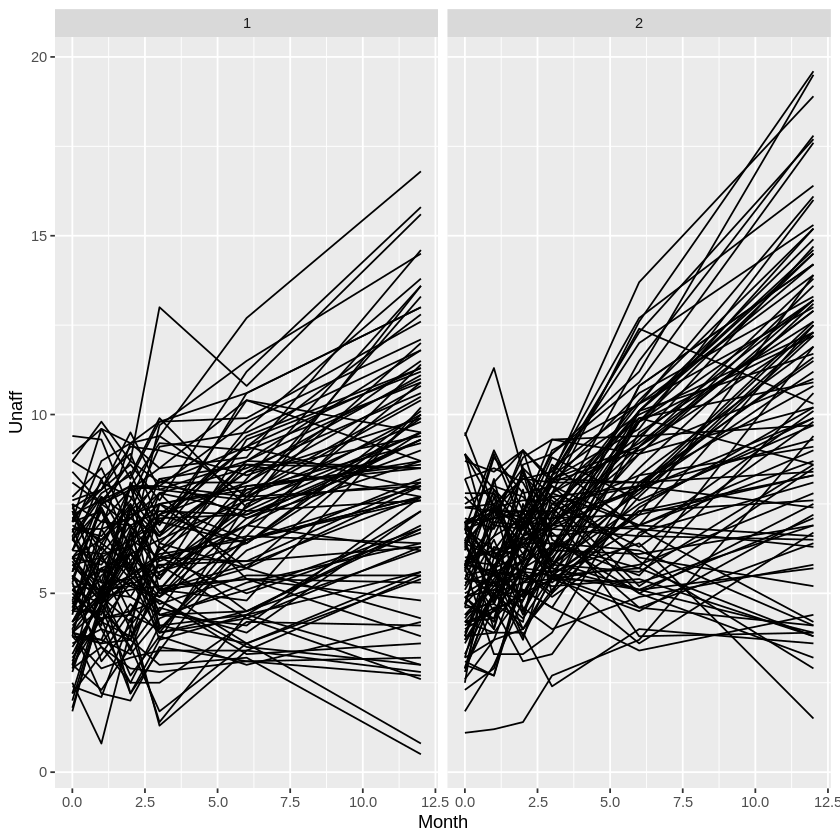

In [116]:
ggplot(toenail,aes(x=Month, y=Unaff, group=Subject)) + geom_line()+ facet_grid(~TR)

- terbinane(1)이 itraconazole(2)보다 기울기가 작은 것처럼 보인다.
- 즉, 더 느리게 발톱이 길어지는 것처럼 보인다.

Bar plot

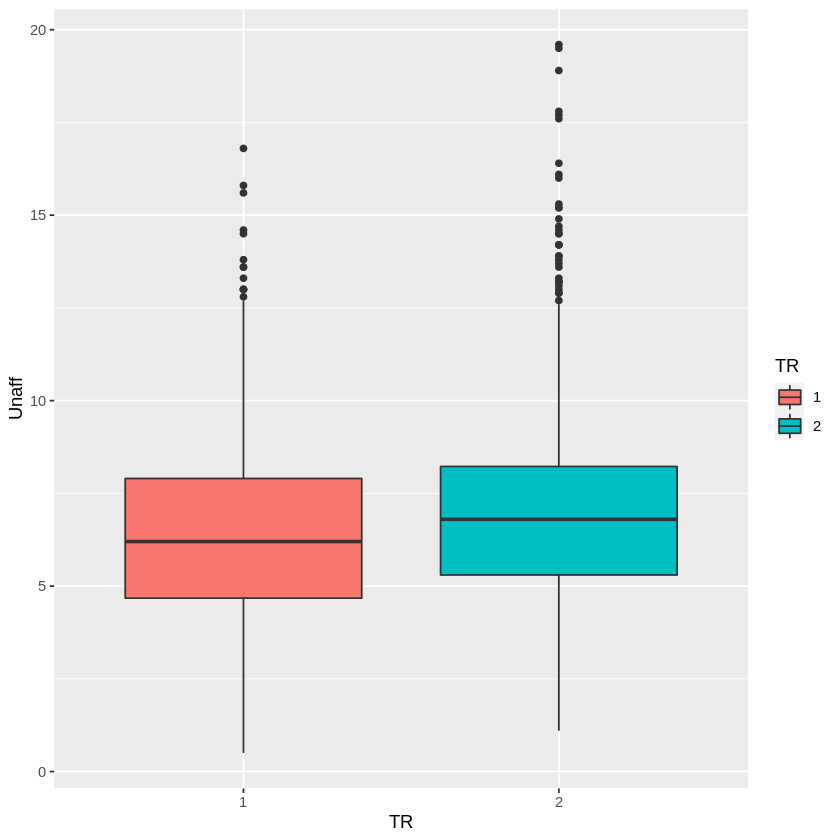

In [118]:
ggplot(toenail,aes(x=TR, y=Unaff,group=TR)) +  geom_boxplot(aes(fill=TR))#+ facet_wrap( ~ TR)

- terbinane(1)이 itraconazole(2)보다 평균이 낮음을 확인해보았다.

In [119]:
var.test(subset(toenail,TR=="1")$Unaff,subset(toenail,TR=="2")$Unaff)


	F test to compare two variances

data:  subset(toenail, TR == "1")$Unaff and subset(toenail, TR == "2")$Unaff
F = 0.75132, num df = 599, denom df = 599, p-value = 0.0004802
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6400281 0.8819585
sample estimates:
ratio of variances 
         0.7513176 


- p값이 0.05보다 작아 등분산 가정을 만족하지 않음을 알 수 있었다.

In [120]:
t.test(subset(toenail,TR=="1")$Unaff,subset(toenail,TR=="2")$Unaff)


	Welch Two Sample t-test

data:  subset(toenail, TR == "1")$Unaff and subset(toenail, TR == "2")$Unaff
t = -4.4983, df = 1174.3, p-value = 7.529e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0024395 -0.3935605
sample estimates:
mean of x mean of y 
 6.427333  7.125333 


- 등분산 옵션을 주지 않고 t test 를 실시하였다.
- Welch Two Sample t-test 결과 귀무가설을 기각하여
- 대립가설인 두 treatment 간 차이가 0이 아니다를 채택하였다.
- 따라서 두 treatment 간 차이가 있다는 evidence 를 제시할 수 있었다.

#### 2) Is there a difference in the pattern of change of lengths of the unafflicted part of the nail between subjects receiving terbinane and itraconazole over a 12 month period? Does one treatment show results more quickly?

In [121]:
lm(Unaff ~ Month, subset(toenail,TR=="1"))


Call:
lm(formula = Unaff ~ Month, data = subset(toenail, TR == "1"))

Coefficients:
(Intercept)        Month  
     5.3414       0.2715  


In [122]:
lm(Unaff ~ Month, subset(toenail,TR=="2"))


Call:
lm(formula = Unaff ~ Month, data = subset(toenail, TR == "2"))

Coefficients:
(Intercept)        Month  
     5.4421       0.4208  


- treatment 별로 month를 독립변수로 하고 unafflicted nail length 를 종속변수로 지정하여 회귀선을 구해보았다.
- terbinane(0.2715)보다 itraconazole(0.4208)의 기울기가 더 가파랐다. 즉, 더 빠르게 길어졌다.

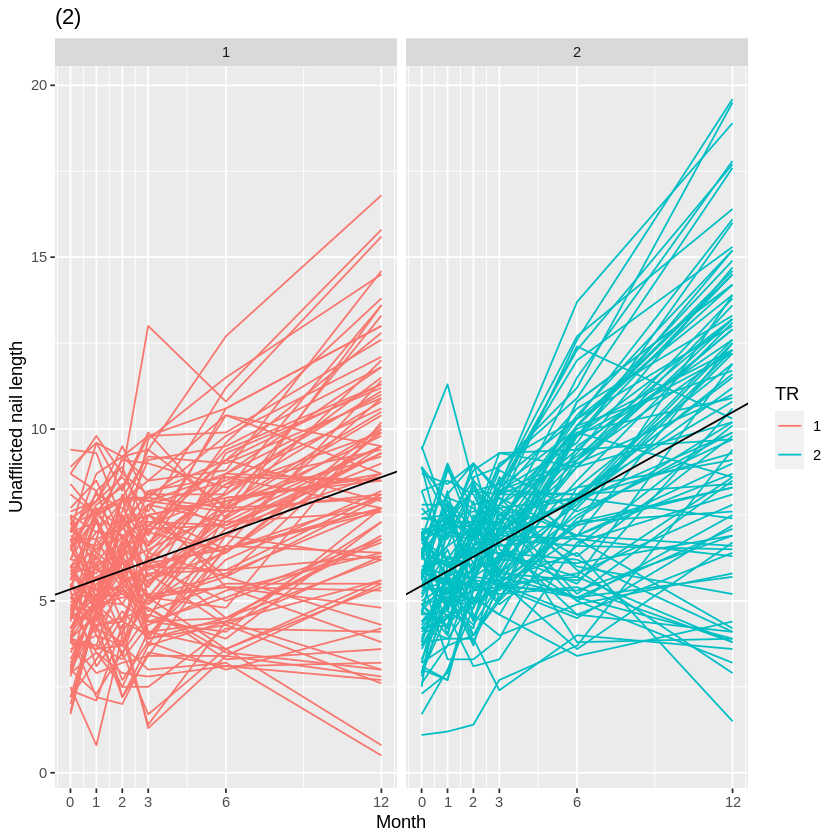

In [123]:
int   <- c(5.3414,5.4421)
slope <- c(0.2715,0.4208)
TR  <- c("1","2")
ref   <- data.frame(int, slope, TR)
ref$TR<-factor(ref$TR,levels=c("1","2"))
ggplot(toenail,aes(x=Month, y=Unaff,group=Subject, colour=TR))+ geom_line()+ ggtitle('(2)')+
  labs( x='Month', y="Unafflicted nail length") + 
  geom_abline(data = ref, aes(intercept=int, slope=slope))+facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

In [124]:
toenail_m <- data.frame(aggregate(Unaff ~ TR+Month, toenail, mean))

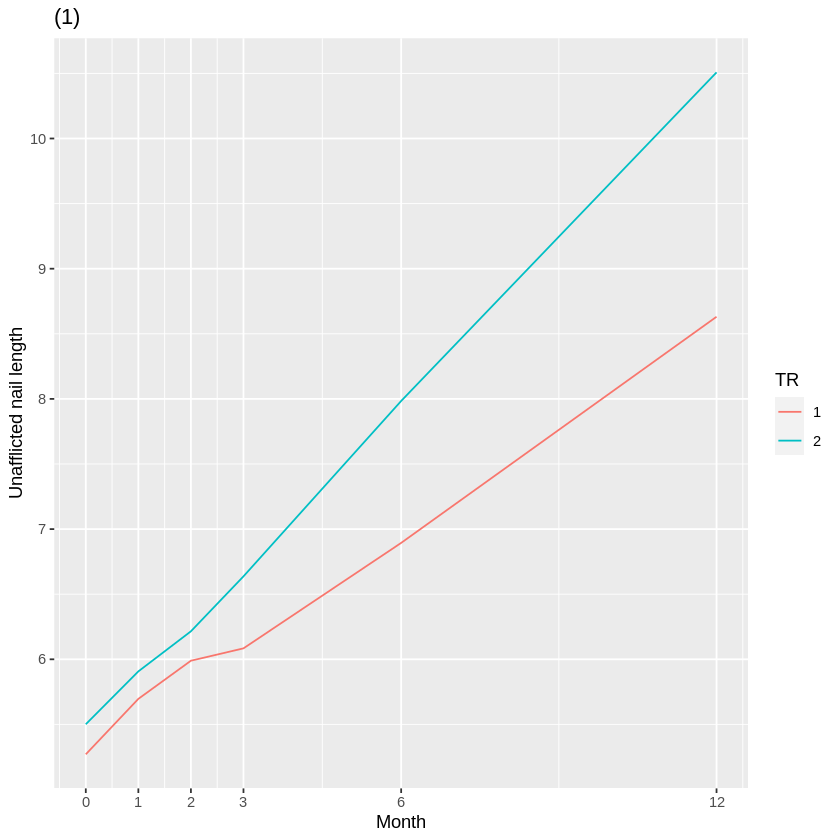

In [125]:
ggplot(toenail_m,aes(x=Month, y=Unaff,group=TR,colour=TR))+ geom_line()+ ggtitle('(1)')+
  labs( x='Month', y="Unafflicted nail length")+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- Month 별, TR 별 평균을 구해 그림을 그려봐도 itraconazole의 기울기가 가파르기 떄문에 terbinane에 비해 더 빨리 치료됨을 알 수 있었다.

#### 3) What is the difference in lengths of the unafflicted part of the nail at the end of the study? Is there evidence to suggest that one of the treatments produces longer lengths on average than the other after 12 months?

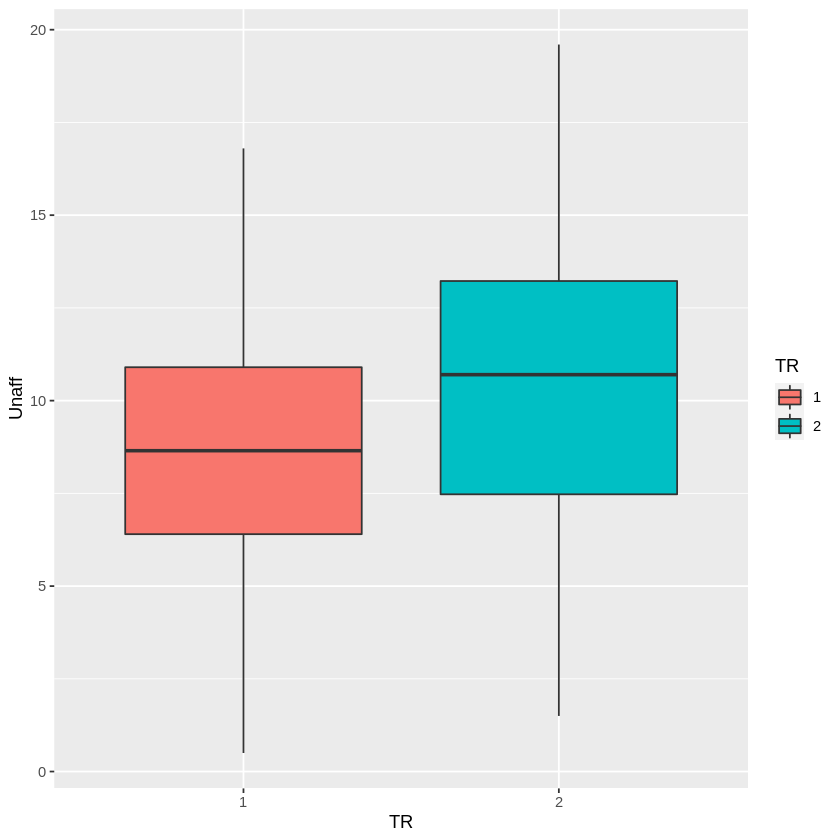

In [127]:
ggplot(subset(toenail,Month==12),aes(x=TR, y=Unaff,group=TR)) +  geom_boxplot(aes(fill=TR))#+ facet_wrap( ~ TR)

- 연구의 마지막 달인 12월 부분만 추출하여 treatment 별 barplot을 그려보았다.
- terbinane이 itraconazole보다 평균이 작은 모습을 볼 수 있었다.

In [128]:
var.test(subset(subset(toenail,Month==12),TR=="1")$Unaff,subset(subset(toenail,Month==12),TR=="2")$Unaff)


	F test to compare two variances

data:  subset(subset(toenail, Month == 12), TR == "1")$Unaff and subset(subset(toenail, Month == 12), TR == "2")$Unaff
F = 0.66169, num df = 99, denom df = 99, p-value = 0.04114
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4452094 0.9834190
sample estimates:
ratio of variances 
         0.6616853 


- p값이 0.05보다 작은 것을 확인하여 등분산 가정을 만족하지 않음을 알 수 있었다.

In [129]:
t.test(subset(subset(toenail,Month==12),TR=="1")$Unaff,subset(subset(toenail,Month==12),TR=="2")$Unaff)


	Welch Two Sample t-test

data:  subset(subset(toenail, Month == 12), TR == "1")$Unaff and subset(subset(toenail, Month == 12), TR == "2")$Unaff
t = -3.5404, df = 190.12, p-value = 0.0005024
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.9227623 -0.8312377
sample estimates:
mean of x mean of y 
    8.631    10.508 


- t test에서 등분산 옵션을 주지 않고 실행하였다.
- Welch Two Sample t-test 결과 귀무가설을 기각하하여
- 귀무가설인 두 treatment 간 차이가 0이 아니다를 채택하였다.
- 따라서 연구의 마지막 시점인 12월에서 두 treatment 간 차이가 있다는 evidence 를 제시할 수 있었다.

In [268]:
tapply(subset(toenail,Month==12)$Unaff, subset(toenail,Month==12)$TR, mean)

1      2 
 8.631 10.508

- terbinane(1)이 itraconazole(2)보다 평균이 작았다.
- 즉, itraconazole를 복용하고 나서 평균적으로 더 긴 Unafflicated naiul length에 도달했다.


#### 4) Recent literature reports have suggested that males tend to have more serious cases of onychomycosis than females. This would be reflected by an association between lengths of the unafficted part of the nail and gender in this population at the beginning of the study (before treatment), with lengths being shorter on average for males than for females (meaning that the disease a icts more of the nail in males). Is there evidence to suggest that this is the case?

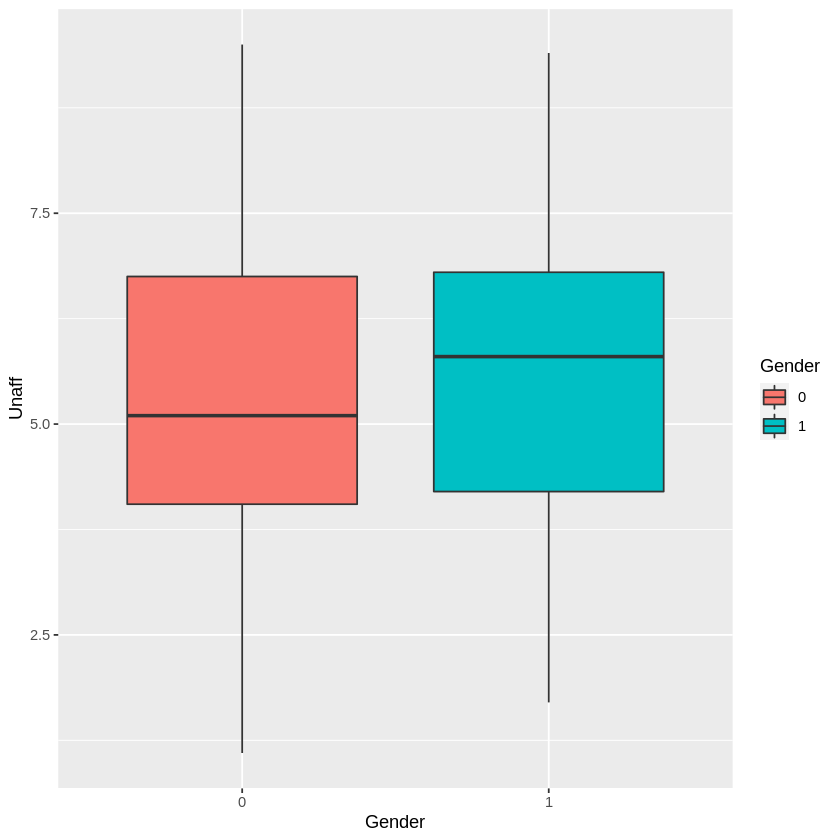

In [208]:
ggplot(subset(toenail,Month==0),aes(x=Gender, y=Unaff,group=Gender)) +  geom_boxplot(aes(fill=Gender))#+ facet_wrap( ~ TR)

- 시각화해봤을 때는 연구 시작 시점인 0에서 남성의 평균이 높아 보인다.

In [131]:
var.test(subset(subset(toenail,Month==0),Gender=="1")$Unaff,subset(subset(toenail,Month==0),Gender=="0")$Unaff)


	F test to compare two variances

data:  subset(subset(toenail, Month == 0), Gender == "1")$Unaff and subset(subset(toenail, Month == 0), Gender == "0")$Unaff
F = 1.0907, num df = 100, denom df = 98, p-value = 0.6671
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7335852 1.6204764
sample estimates:
ratio of variances 
          1.090739 


- p값이 0.05보다 크며, 남성, 여성 별로 등분산 가정을 만족하는 모습이다.

In [132]:
t.test(subset(subset(toenail,Month==0),Gender=="1")$Unaff,subset(subset(toenail,Month==0),Gender=="0")$Unaff,var.equal=TRUE)


	Two Sample t-test

data:  subset(subset(toenail, Month == 0), Gender == "1")$Unaff and subset(subset(toenail, Month == 0), Gender == "0")$Unaff
t = 1.1188, df = 198, p-value = 0.2646
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2130323  0.7716682
sample estimates:
mean of x mean of y 
 5.523762  5.244444 


- 등분산 옵션을 준 후 t test를 진행해 보았다.
- p값이 0.05보다 컸으며, 귀무가설을 기각하지 못하여
- 귀무가설인 차이가 0이다를 채택하였다.
- 따라서 연구 시작 시점에서 평균적으로 남성 여성의 toenail 길이가 차이가 없다는 evidence를 제시할 수 있었다.

In [266]:
toenail_12m <- data.frame(aggregate(Unaff ~ TR, subset(toenail,Month==12), mean))

In [267]:
summary(aov(data=toenail_12m,Unaff~TR))

            Df Sum Sq Mean Sq
TR           1  1.762   1.762

- ANOVA 검정 결과, Gender 의 F값이 유의하지 않으므로,(p=0.397) Gender 와 Unafflicted nail length 간에는 통계적으로 선형적인 관련성이 없다고 할 수 있다.

In [249]:
summary(lm(Unaff~Gender,toenail_mf))


Call:
lm(formula = Unaff ~ Gender, data = toenail_mf)

Residuals:
       1        2        3        4 
-0.26220  0.26220  0.02551 -0.02551 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   5.2418     0.1863  28.139  0.00126 **
Gender1       0.2817     0.2634   1.069  0.39686   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2634 on 2 degrees of freedom
Multiple R-squared:  0.3638,	Adjusted R-squared:  0.04566 
F-statistic: 1.144 on 1 and 2 DF,  p-value: 0.3969


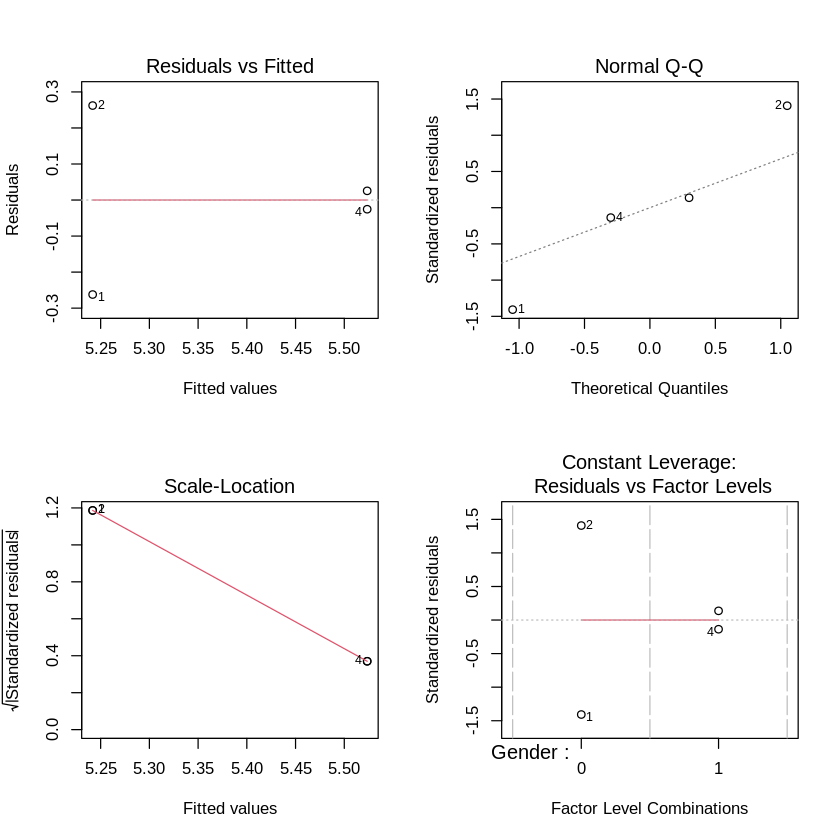

In [250]:
par(mfrow=c(2,2))
plot(lm(Unaff~Gender,toenail_mf))

- 단순 선형회귀 분석 결과, F 값은 1.144이 나왔고, p값은 0.3969가 나와 모형이 유의미하지 않음을 의미한다.
- 또한, 수정된 $R^2$ 값은 4.57%로 모형을 4.57%만큼만 설명하고 있음을 나타낸다.
- 따라서 단순 선형회귀 분석을 이용하여 before treatment 시점에서 평균적으로 성별간 차이가 없다는 evidence를 제시할 수 있었다.

In [133]:
toenail_mf <- data.frame(aggregate(Unaff ~ TR+Month+Gender, toenail, mean))
#arrange(toenail_mf,Month)a

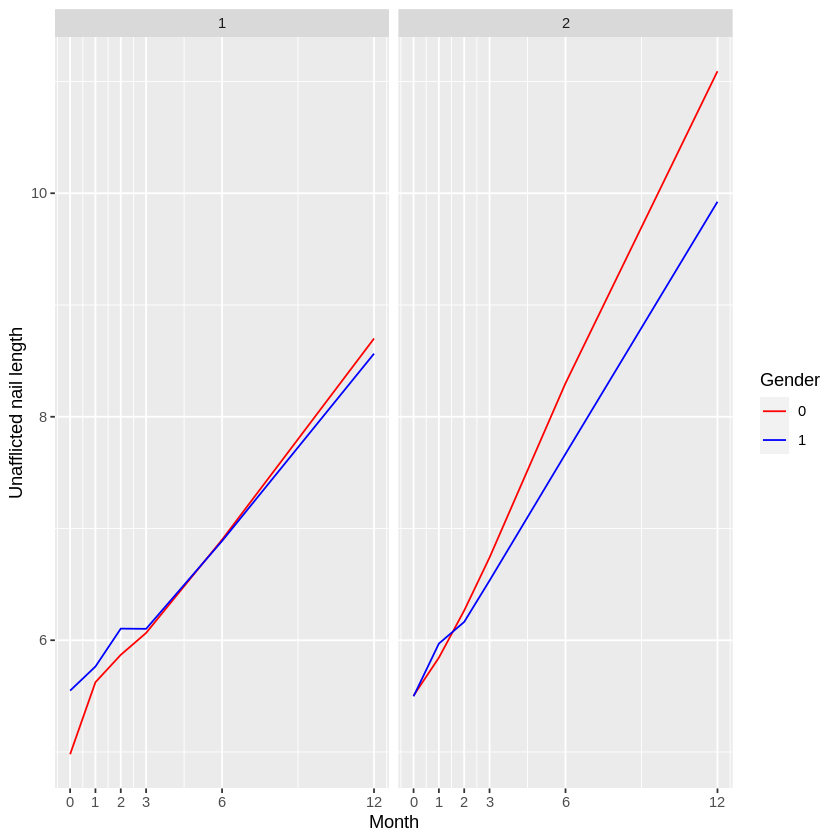

In [204]:
ggplot(toenail_mf,aes(x=Month, y=Unaff,group=Gender,colour=Gender))+ geom_line()+
scale_colour_manual(values=c("red", "blue"))+
  labs( x='Month', y="Unafflicted nail length") + facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- 시간 순으로 성별, 치료별 평균 plot을 제시하였다.
- 모든 treatment 전에 평균이 비슷해보이는 모습이었다.
- 또한, 모든 시점에서 본다면, terbinane에서는 남성, 여성이 비슷하지만
- itraconazole에서는 연구 마지막 쯤 여성이 더 긴 모습이다.

#### 5) As noted above, the time spent in shared locker rooms and showers is thought to be associated with developing onychomycosis. A recent report has further hypothesized that the severity of the disease is also associated with this practice. Is there evidence in these data that subjects in this population who spend more than one day per week at a gym or health club have nail lengths different from those who spend less time at the beginning of the study (before treatment)? (One might expect that shorter lengths would be seen in those who spend more time if this were true.)

In [142]:
toenail_gym <- data.frame(aggregate(Unaff ~ TR+Month+Healthclb, toenail, mean))
#arrange(toenail_gym,Month)

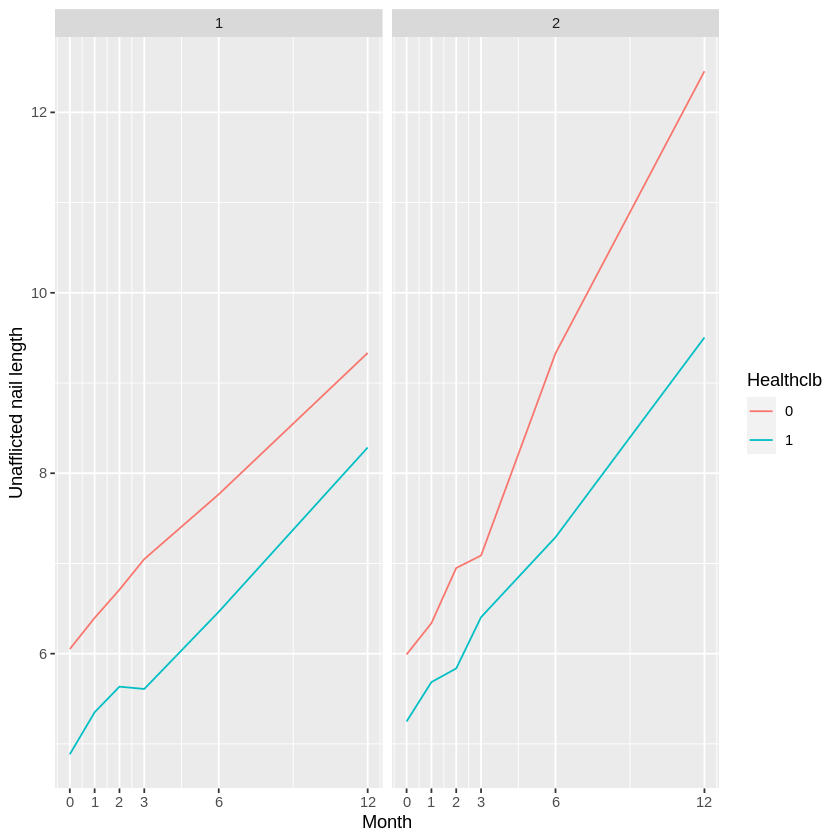

In [143]:
ggplot(toenail_gym,aes(x=Month, y=Unaff,group=Healthclb,colour=Healthclb))+ geom_line()+
  labs( x='Month', y="Unafflicted nail length") + facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- 시점별로 치료별, 헬스장 간 횟수별로 시각화해서 보았다.
- 모든 Treatment 에서 Health club에 일주일에 하루 이상 간 사람(1)의 발톱 길이가 평균적으로 매월 더 작았다.

In [262]:
toenail_gym <- data.frame(aggregate(Unaff ~ TR+Healthclb, subset(toenail,Month==0), mean))

In [263]:
summary(aov(data=toenail_gym,Unaff~Healthclb))

            Df Sum Sq Mean Sq F value Pr(>F)  
Healthclb    1 0.9112  0.9112   26.86 0.0353 *
Residuals    2 0.0679  0.0339                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- ANOVA 검정 결과, Health club frequency 의 F값이 유의하므로,(p=0353) Health club freauency 와 Unafflicted nail length 간에는 통계적으로 선형적인 관련성이 있다고 할 수 있다.

In [264]:
summary(lm(Unaff~Healthclb,toenail_gym))


Call:
lm(formula = Unaff ~ Healthclb, data = toenail_gym)

Residuals:
       1        2        3        4 
 0.03017 -0.03017 -0.18171  0.18171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0213     0.1302  46.231 0.000468 ***
Healthclb1   -0.9546     0.1842  -5.182 0.035275 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1842 on 2 degrees of freedom
Multiple R-squared:  0.9307,	Adjusted R-squared:  0.896 
F-statistic: 26.86 on 1 and 2 DF,  p-value: 0.03528


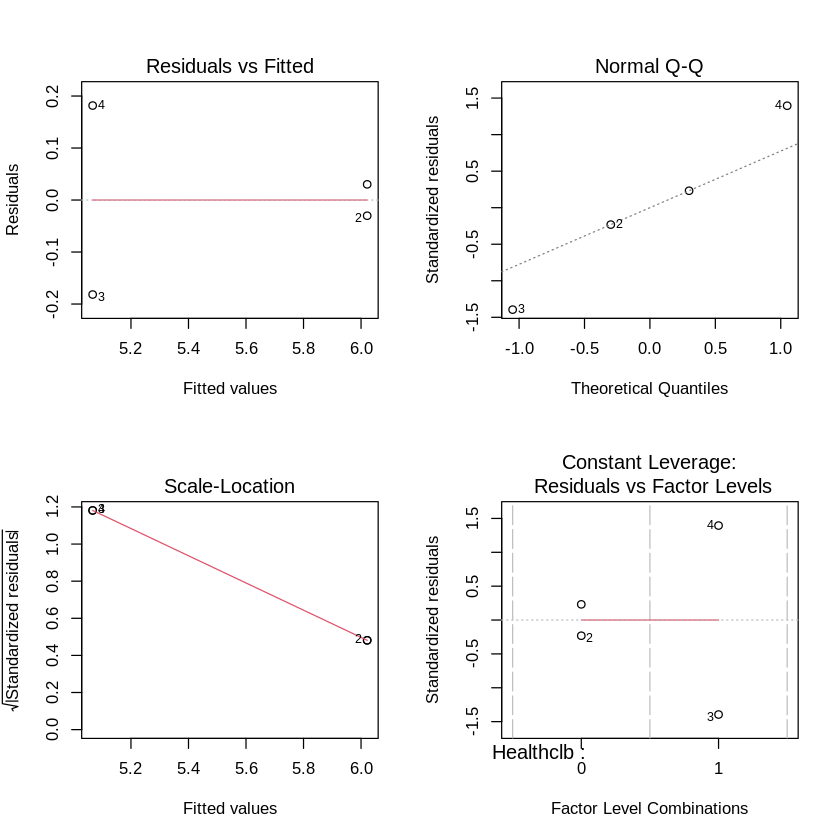

In [265]:
par(mfrow=c(2,2))
plot(lm(Unaff~Healthclb,toenail_gym))

- 단순 선형회귀 분석 결과, F 값은 26.86이 나왔고, p값은 0.03528가 나와 모형이 유의미함을 의미한다.
- 또한, 수정된 $R^2$ 값은 89.6%로 모형을 어느정도 잘 설명하고 있음을 나타낸다.
- 또한 변수가 Unafflicted nail length와 유의한 관계를 보이고 있었다.
- $Unafflicted nail length=6.0213-0.9546Health club frequency$
- before treatment 시점에서 Health club에 일주일에 1번 이상 간 사람이 일주일에 1번 이나 안 간 사람보다 0.9546만큼 작았다.
- 따라서 before treatment 시점에서 health club에서 일주일에 하루 이상 보낸 대상자 군이 그 보다 적게 health club에서 보낸 사람과보다 작다는 evidence를 제시할 수 있었다.

#### 6) Is there an association between the pattern of change of nail lengths and gender and/or health club frequency in subjects taking terbinane? This might indicate that this drug brings about relief more swiftly in some kinds of subject versus others.

In [155]:
toenail_gym_mf <- data.frame(aggregate(Unaff ~ TR+Month+Healthclb+Gender, toenail, mean))
#arrange(toenail_gym_mf,Month)
toenail_gym_mf_1 <- subset(toenail_gym_mf,TR=="1")

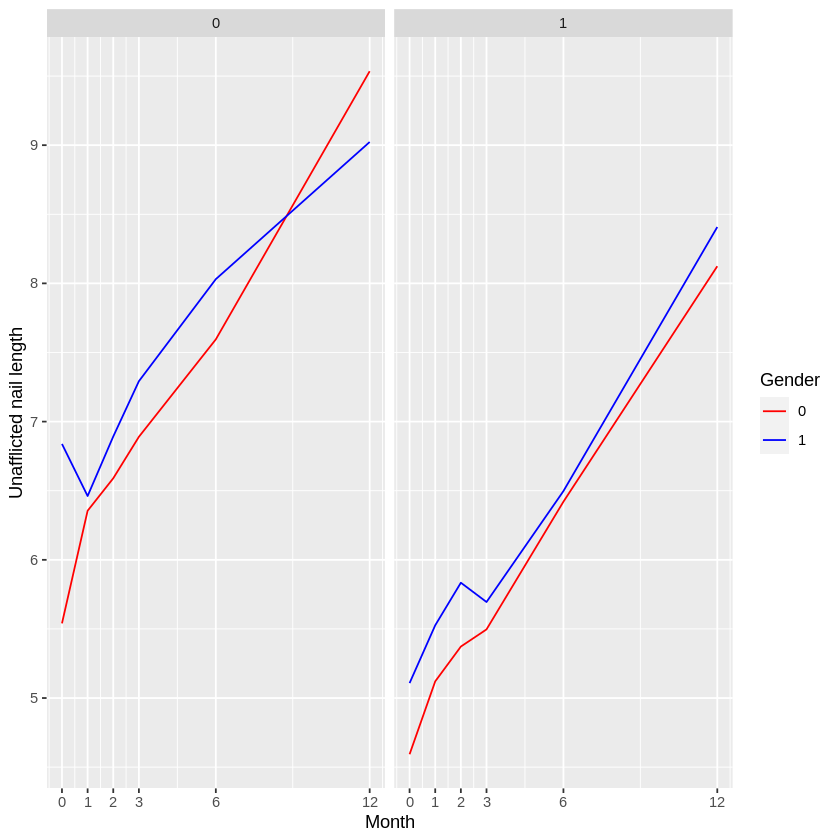

In [203]:
ggplot(toenail_gym_mf_1,aes(x=Month, y=Unaff,group=Gender,colour=Gender))+ geom_line()+
scale_colour_manual(values=c("red", "blue"))+
  labs( x='Month', y="Unafflicted nail length")  + facet_wrap(~Healthclb)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- terbinane을 복용한 대상자들을 대상으로 성별, health glub 빈도 별 평균을 구해 그림을 그려보았다.
- gym 빈도별로 보았을때. 공용 shower 시설을 덜 이용한, 즉 healtnclub에 간 빈도가 적은 대상자들의 toenail 길이가 더 길게 자랐으며,
- 헬스장 빈도가 적은 대상자들 중에서도 여성의 길이가 길었다.
- 즉, 헬스장가는 빈도가 적은 여성 대상자에 terbinane을 투여 했을때, 평균적으로 더 큰 효과를 얻을 수 있다.

In [217]:
summary(lm(Unaff~Month+Gender+Healthclb,toenail_gym_mf_1))


Call:
lm(formula = Unaff ~ Month + Gender + Healthclb, data = toenail_gym_mf_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52570 -0.10577  0.04581  0.10712  0.48403 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.02324    0.09727  61.923  < 2e-16 ***
Month        0.26620    0.01206  22.064 1.64e-15 ***
Gender1      0.33119    0.09752   3.396  0.00287 ** 
Healthclb1  -1.23729    0.09752 -12.688 5.05e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2389 on 20 degrees of freedom
Multiple R-squared:  0.9706,	Adjusted R-squared:  0.9661 
F-statistic: 219.8 on 3 and 20 DF,  p-value: 1.786e-15


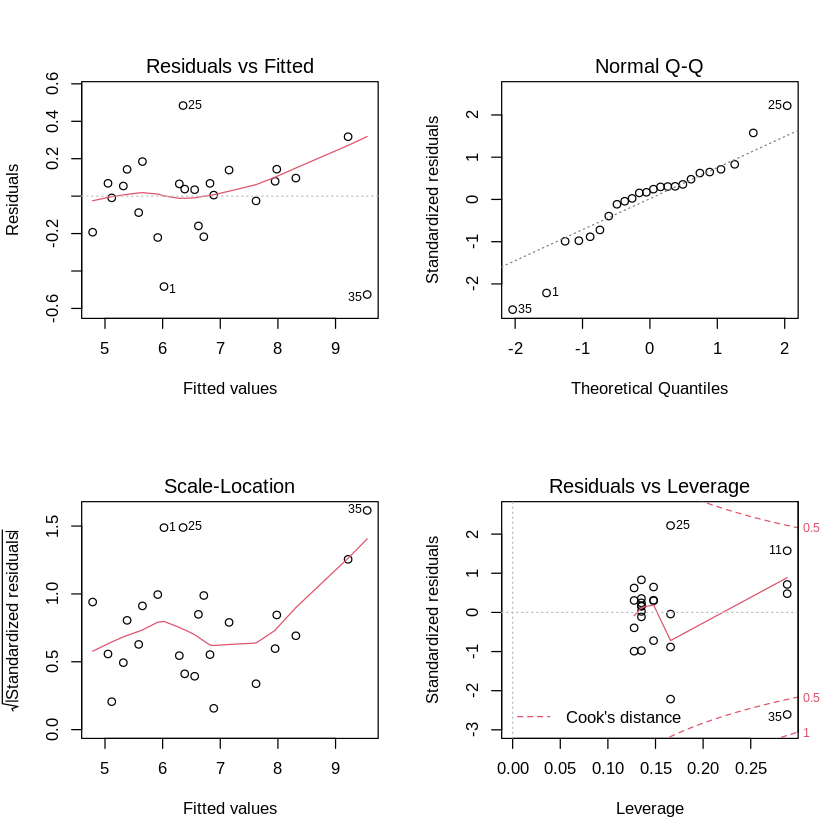

In [218]:
par(mfrow=c(2,2))
plot(lm(Unaff~Month+Gender+Healthclb,toenail_gym_mf_1))

- 다중 선형회귀 분석 결과, F 값은 219.8이 나왔고, p값은 1.786e-15가 나와 모형이 유의미함을 나타냈다.
- 또한, 수정된 $R^2$ 값은 96.61로 모형을 잘 설명하고 있음을 나타낸다.
- 또한 모든 변수가 Unafflicted nail length와 유의한 관계를 보이고 있었다.
- $Unafflicted nail length=6.0234+0.26620Month+0.33119Gender-1.23728Health club frequency$
- 남성(1)은 여성(0)보다 평균적으로 0.3311만큼 높았다.(남성에게 덜 효과가 있는 약이다.)
- Health club에 일주일에 1번 이상 간 사람이 일주일에 1번 이나 안 간 사람보다 1.23728만큼 낮았다.(shared loker room에 많이 방문한 사람이 더 낮은 길이를 가졌다.)

#### 7) Is there an association between the pattern of change of nail lengths and gender and/or health club frequency in subjects taking itraconazole? This might indicate that this drug brings about relief more swiftly in some kinds of subject versus others.

In [194]:
toenail_gym <- data.frame(aggregate(Unaff ~ TR+Month+Healthclb, toenail, mean))
lm(Unaff ~ Month, subset(toenail_gym,TR=="2"))
toenail_gym_mf_2 <- subset(toenail_gym_mf,TR=="2")


Call:
lm(formula = Unaff ~ Month, data = subset(toenail_gym, TR == 
    "2"))

Coefficients:
(Intercept)        Month  
     5.5307       0.4532  


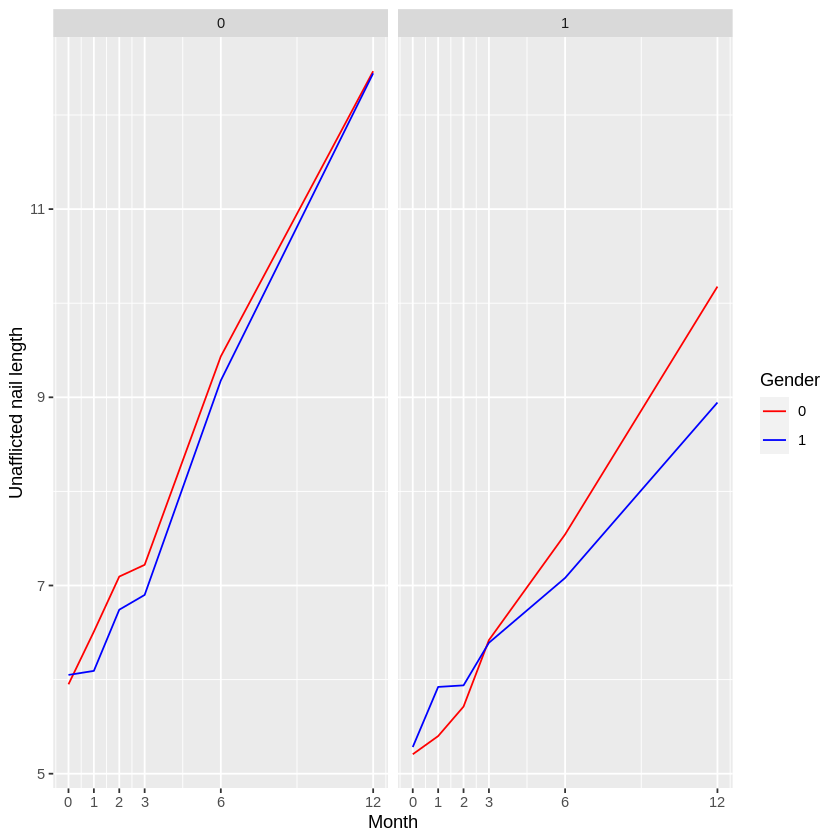

In [202]:
ggplot(toenail_gym_mf_2,aes(x=Month, y=Unaff,group=Gender,colour=Gender))+ geom_line()+
  scale_colour_manual(values=c("red", "blue"))+
  labs( x='Month', y="Unafflicted nail length")  + facet_wrap(~Healthclb)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- itraconazole을 복용한 대상자들을 추출하여 성별, 헬스장 빈도별 시각화를 해보았다.
- terbinane를 복용했을 때와 마찬가지로 헬스장을 간 횟수가 적었을때 Unafflicted nail length 가 시점이 흐를 수록 더 길었으며,
- 성별간 차이가 없는 모습이었다.
- 따라서 itraconazole을 복용한 대상자들은 헬스장에 간 횟수가 적을 수록 효과가 좋으며, 성별간 차이가 없다는 결론이 나왔다.

In [219]:
summary(lm(Unaff~Month+Gender+Healthclb,toenail_gym_mf_2))


Call:
lm(formula = Unaff ~ Month + Gender + Healthclb, data = toenail_gym_mf_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28798 -0.27510 -0.06399  0.29343  0.87202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.26999    0.21243  29.516  < 2e-16 ***
Month        0.45678    0.02635  17.336 1.62e-13 ***
Gender1     -0.18056    0.21297  -0.848    0.407    
Healthclb1  -1.33842    0.21297  -6.285 3.90e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5217 on 20 degrees of freedom
Multiple R-squared:  0.9446,	Adjusted R-squared:  0.9362 
F-statistic: 113.6 on 3 and 20 DF,  p-value: 9.886e-13


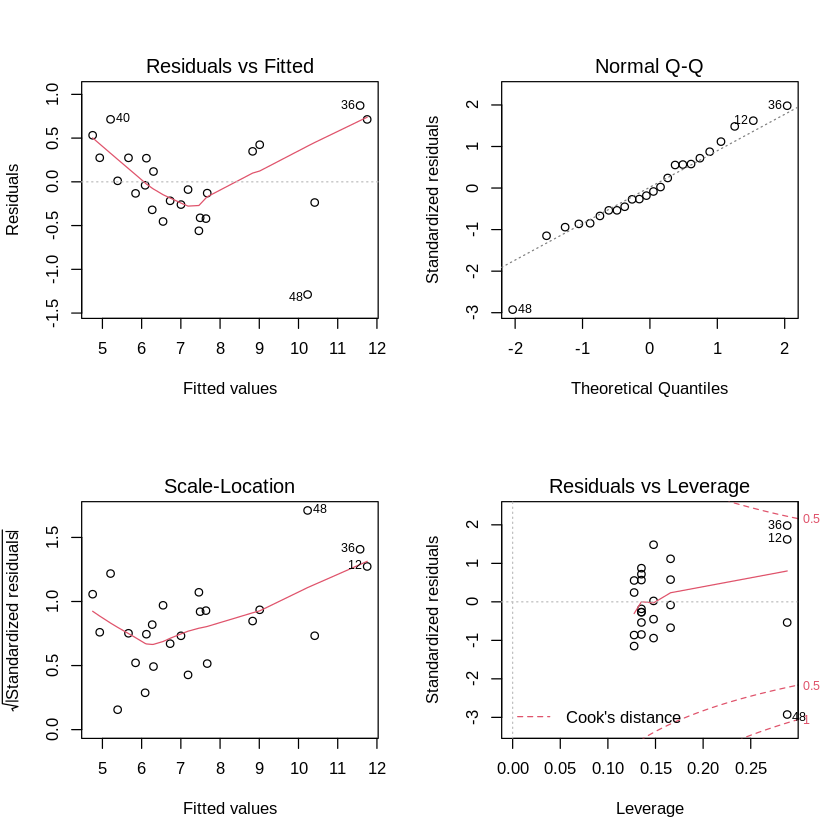

In [220]:
par(mfrow=c(2,2))
plot(lm(Unaff~Month+Gender+Healthclb,toenail_gym_mf_2))

- 다중 선형회귀 분석 결과, F 값은 113.6이 나왔고, p값은 9.886e-13가 나와 모형이 유의미함을 나타냈다.
- 또한, 수정된 $R^2$ 값은 93.62로 모형을 어느정도 잘 설명하고 있음을 나타낸다.
- 또한 Gender를 제외한 모든 변수가 Unafflicted nail length와 유의한 관계를 보이고 있었다.
- $Unafflicted nail length=6.26999+0.45678Month-0.18056Gender-1.33842Health club frequency$
- 남성(1)은 여성(0)보다 평균적으로 0.18056만큼 낮았다.
- Health club에 일주일에 1번 이상 간 사람이 일주일에 1번 이나 안 간 사람보다 1.33842만큼 낮았다.(shared loker room에 많이 방문한 사람이 더 낮은 길이를 가졌다.)